In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, minimum_filter
import importlib

import keypointDetect
importlib.reload(keypointDetect)
from keypointDetect import *

In [29]:
levels = [-1,0,1,2,3,4]
im = cv2.imread('data/model_chickenbroth.jpg')

# test gaussian pyramid
gaussian_pyr = createGaussianPyramid(im)
# compute DoG pyramid
DoG_pyr, DoG_levels = createDoGPyramid(im_pyr, levels)
# compute principal curvature
pc_curvature = computePrincipalCurvature(DoG_pyr)

# save gaussian and DoG pyramids
gaussian_pyr = displayPyramid(gaussian_pyr)
cv2.imwrite('results/gaussian-pyramid.png', 255*gaussian_pyr)
DoG_pyr = displayPyramid(DoG_pyr)
cv2.imwrite('results/DoG-pyramid.png', 255*DoG_pyr)

th_contrast=0.03
th_r = 12

(-0.5, 195.5, 277.5, -0.5)

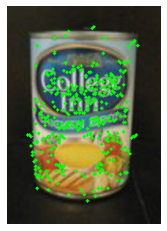

In [11]:
keypoints, gaussian_pyr = DoGdetector(im)
tmp_im = cv2.resize(im, (2*im.shape[1], 2*im.shape[0]))
for point in keypoints:
    cv2.circle(tmp_im, (2*point[0], 2*point[1]), 2, (0, 255, 0), -1)
plt.imshow(cv2.cvtColor(tmp_im, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [21]:
pc_curvature[14,24,0]

-9.101885795593262

In [36]:
i,j,k = 24,14,0
test_neighbour = DoG_pyr[i-1:i+2,j-1:j+2,k]
DoG_pyr[i,j,k-1], DoG_pyr[i,j,k+1],pc_curvature[i,j,k]

(0.005297065, 0.025067806, 12.710211753845215)

In [37]:
test_neighbour

array([[ 0.01858717,  0.02504183, -0.0185748 ],
       [ 0.01968636,  0.03023371, -0.01819843],
       [ 0.01697645,  0.02790041, -0.02092391]], dtype=float32)